In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error,mean_squared_error,root_mean_squared_error
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris=pd.DataFrame(pd.read_csv('iris.csv'))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
for i in iris.columns:
  print(i,iris[i].unique())

sepal_length [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal_width [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal_length [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal_width [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
le=LabelEncoder()
iris['species']=le.fit_transform(iris['species'])
print(iris['species'].unique())

[0 1 2]


In [12]:
X_train,X_test,y_train,y_test=train_test_split(iris.drop('species',axis=1),iris['species'],test_size=0.2,random_state=42)
DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


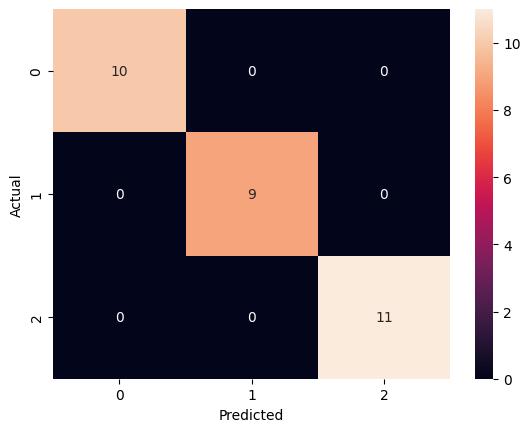

In [15]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
drug=pd.DataFrame(pd.read_csv('drug.csv'))
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
for i in drug.columns:
  drug[i]=le.fit_transform(drug[i])
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,4
1,30,1,1,0,89,2
2,30,1,1,0,43,2
3,12,0,2,0,10,3
4,44,0,1,0,133,4
...,...,...,...,...,...,...
195,39,0,1,0,69,2
196,1,1,1,0,75,2
197,35,1,2,0,36,3
198,8,1,2,1,102,3


In [18]:
X_train,X_test,y_train,y_test=train_test_split(drug.drop('Drug',axis=1),drug['Drug'],test_size=0.2,random_state=42)
DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


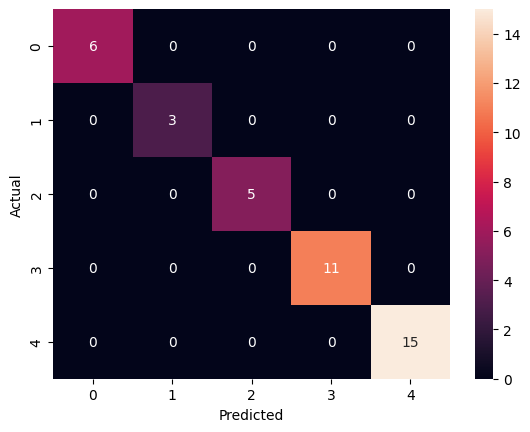

In [19]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
petrol=pd.DataFrame(pd.read_csv('petrol_consumption.csv'))
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [28]:
X_train,X_test,y_train,y_test=train_test_split(petrol.drop('Petrol_Consumption',axis=1),petrol['Petrol_Consumption'],test_size=0.2,random_state=42)
DT=DecisionTreeRegressor(random_state=42)
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rms=root_mean_squared_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rms)


Mean Absolute Error: 94.3
Mean Squared Error: 17347.7
Root Mean Squared Error: 131.7106677532234
